In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import random
from sklearn.svm import SVC
import sklearn.metrics as mt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree


In [2]:
data = pd.read_csv("D:/UTD Fall 2020/ML/Assignment2/UCI_Credit_Card.csv", encoding= 'unicode_escape')
data.shape

(30000, 25)

In [3]:
#Viewing data
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#structure of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
data.isnull().sum() 

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
#Feature Engineering and creating dummy variables
data["SEX"].unique()

array([2, 1], dtype=int64)

In [7]:
data['SEX']=np.where(data['SEX'] == 1, "Male", data['SEX'])
data['SEX']=np.where(data['SEX'] == "2", "Female", data['SEX'])
data['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [8]:
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])
data['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [9]:
data['MARRIAGE']=np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])
data['MARRIAGE']=np.where(data['MARRIAGE'] == 1, "married", data['MARRIAGE'])
data['MARRIAGE']=np.where(data['MARRIAGE'] == "2", "single", data['MARRIAGE'])
data['MARRIAGE']=np.where(data['MARRIAGE'] == "3", "others", data['MARRIAGE'])

In [10]:
dummies_sex = pd.get_dummies(data['SEX'],prefix="Sex",drop_first=True)
dummies_marriage = pd.get_dummies(data['MARRIAGE'],prefix="Marriage",drop_first=True)
data = pd.concat([data,dummies_sex,dummies_marriage], axis=1)   
data=data.drop(columns =['ID','SEX','MARRIAGE'], axis = 1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   EDUCATION                   30000 non-null  int64  
 2   AGE                         30000 non-null  int64  
 3   PAY_0                       30000 non-null  int64  
 4   PAY_2                       30000 non-null  int64  
 5   PAY_3                       30000 non-null  int64  
 6   PAY_4                       30000 non-null  int64  
 7   PAY_5                       30000 non-null  int64  
 8   PAY_6                       30000 non-null  int64  
 9   BILL_AMT1                   30000 non-null  float64
 10  BILL_AMT2                   30000 non-null  float64
 11  BILL_AMT3                   30000 non-null  float64
 12  BILL_AMT4                   30000 non-null  float64
 13  BILL_AMT5                   300

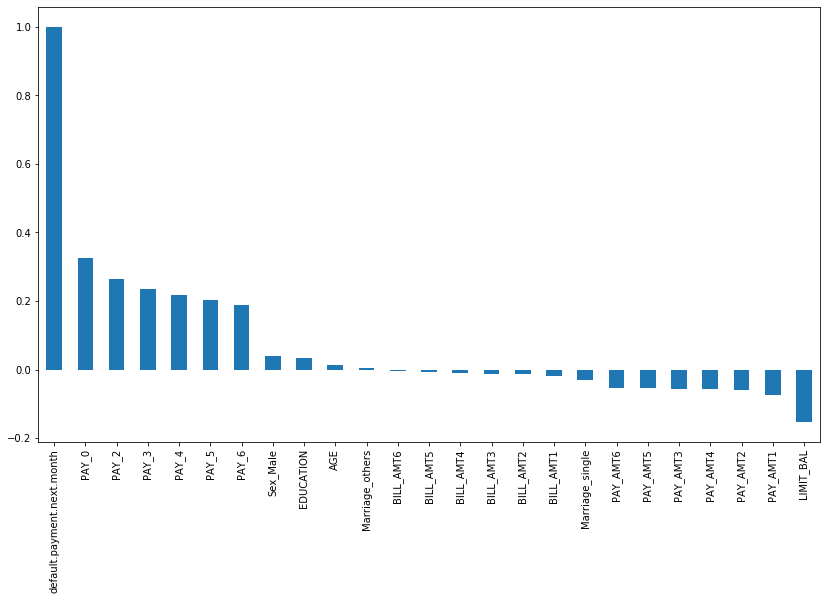

In [12]:
#Correlation plot
plt.figure(figsize=(14,8))
data.corr()['default.payment.next.month'].sort_values(ascending = False).plot(kind='bar')

In [13]:
df=data
sc=StandardScaler()
data.iloc[:,0:21]=sc.fit_transform(data.iloc[:,0:21])

In [36]:
data.head()

,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Sex_Male,Marriage_others,Marriage_single
0,-1.136720,0.21187,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,...,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,0,0,0
1,-0.365981,0.21187,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,...,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,0,0,1
2,-0.597202,0.21187,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,...,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0,0,0,1
3,-0.905498,0.21187,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,...,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0,0,0,0
4,-0.905498,0.21187,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,...,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,1,0,0


In [37]:
data_target=data[['default.payment.next.month']].values
data_predictors=data.drop(columns=['default.payment.next.month'],axis=1).values
x_train, x_test, y_train, y_test = train_test_split(data_predictors, data_target, test_size = 0.2, random_state = 0)

In [38]:
#Linear kernel SVM
print('Linear SVM kernel',end='\n')
linear_svm = SVC(kernel='linear')
linear_svm.fit(x_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = linear_svm, X = x_train, y = y_train, cv = 10)
linear_svm_mean=accuracies.mean()
linear_svm_std=accuracies.std()

#After using 10 fold cross validation
print('After 10 fold cross validation:')
print('Mean Accuracy: ',linear_svm_mean*100,end='\n')
print('Standard deviation of Accuracies',linear_svm_std*100,end='\n')

#Predict SVM
y_pred= linear_svm.predict(x_test)

#Confusion Matrix
print('Confusion Matrix from test set:')
print(mt.confusion_matrix(y_test,y_pred))
print('Classification Report:')
print(mt.classification_report(y_test,y_pred))
print('Accuracy: ',mt.accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))


Linear SVM kernel


C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

After 10 fold cross validation:
Mean Accuracy:  80.67500000000001
Standard deviation of Accuracies 0.38360497621612955
Confusion Matrix from test set:
[[4594  109]
 [ 986  311]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      4703
           1       0.74      0.24      0.36      1297

    accuracy                           0.82      6000
   macro avg       0.78      0.61      0.63      6000
weighted avg       0.81      0.82      0.78      6000

Accuracy:  0.8175


In [16]:
#polynomial kernel SVM
print('polynomial SVM kernel',end='\n')
polynomial_svm = SVC(kernel='poly')
polynomial_svm.fit(x_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = polynomial_svm, X = x_train, y = y_train, cv = 10)
polynomial_svm_mean=accuracies.mean()
polynomial_svm_std=accuracies.std()

#After using 10 fold cross validation
print('After 10 fold cross validation:')
print('Mean Accuracy: ',polynomial_svm_mean*100,end='\n')
print('Standard deviation of Accuracies',polynomial_svm_std*100,end='\n')

#Predict SVM
y_pred= polynomial_svm.predict(x_test)

#Confusion Matrix
print('Confusion Matrix from test set:')
print(mt.confusion_matrix(y_test,y_pred))
print('Classification Report:')
print(mt.classification_report(y_test,y_pred))
print('Accuracy: ',mt.accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))


polynomial SVM kernel


C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

After 10 fold cross validation:
Mean Accuracy:  80.42916666666666
Standard deviation of Accuracies 0.5755583038329922
Confusion Matrix from test set:
[[4575  128]
 [1012  285]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4703
           1       0.69      0.22      0.33      1297

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.61      6000
weighted avg       0.79      0.81      0.77      6000

Accuracy:  0.81


In [25]:
#RBF kernel SVM
print('RBF kernel',end='\n')
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(x_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = rbf_svm, X = x_train, y = y_train, cv = 10)
rbf_svm_mean=accuracies.mean()
rbf_svm_std=accuracies.std()

#After using 10 fold cross validation
print('After 10 fold cross validation:')
print('Mean Accuracy: ',rbf_svm_mean*100,end='\n')
print('Standard deviation of Accuracies',rbf_svm_std*100,end='\n')

#Predict SVM
y_pred= rbf_svm.predict(x_test)

#Confusion Matrix
print('Confusion Matrix from test set:')
print(mt.confusion_matrix(y_test,y_pred))
print('Classification Report:')
print(mt.classification_report(y_test,y_pred))
print('Accuracy: ',mt.accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))


RBF kernel


C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

After 10 fold cross validation:
Mean Accuracy:  81.75833333333333
Standard deviation of Accuracies 0.5645179851479978
Confusion Matrix from test set:
[[4511  192]
 [ 851  446]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4703
           1       0.70      0.34      0.46      1297

    accuracy                           0.83      6000
   macro avg       0.77      0.65      0.68      6000
weighted avg       0.81      0.83      0.80      6000

Accuracy:  0.8261666666666667


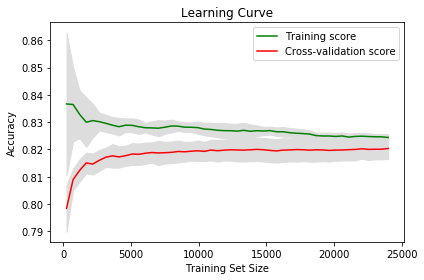

In [74]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(rbf_svm, 
                                                        data_predictors, 
                                                        data_target,
                                                        # Number of folds in cross-validation
                                                        cv=cv,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 training sets of different sizes
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Means and standard deviations of 10 fold cv of training sets
train_accu_mean = np.mean(train_scores, axis=1)
train_accu_std = np.std(train_scores, axis=1)

# Means and standard deviations of 10 fold cv of test sets
test_accu_mean = np.mean(test_scores, axis=1)
test_accu_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_accu_mean, color="green",  label="Training score")
plt.plot(train_sizes, test_accu_mean, color="red", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_accu_mean - train_accu_std, train_accu_mean + train_accu_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_accu_mean - test_accu_std, test_accu_mean + test_accu_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [14]:
df_target=df[['default.payment.next.month']].values
df_predictors=df.drop(columns=['default.payment.next.month'],axis=1).values
x_train, x_test, y_train, y_test = train_test_split(df_predictors, df_target, test_size = 0.2, random_state = 0)

In [15]:
#Entropy Model
entropy_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
entropy_tree.fit(x_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = entropy_tree, X = x_train, y = y_train, cv = 10)
entropy_tree_mean=accuracies.mean()
entropy_tree_std=accuracies.std()

#After using 10 fold cross validation
print('After 10 fold cross validation:')
print('Mean of Accuracies: ',entropy_tree_mean*100,end='\n')
print('Standard deviation of Accuracies',entropy_tree_std*100,end='\n')

#predict y
y_pred = entropy_tree.predict(x_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(mt.confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(mt.classification_report(y_test, y_pred))
print('Accuracy: ',mt.accuracy_score(y_test,y_pred))

After 10 fold cross validation:
Mean of Accuracies:  72.46666666666665
Standard deviation of Accuracies 0.7126827251075117
Test Output:
Confusion Matrix:
[[3886  817]
 [ 772  525]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4703
           1       0.39      0.40      0.40      1297

    accuracy                           0.74      6000
   macro avg       0.61      0.62      0.61      6000
weighted avg       0.74      0.74      0.74      6000

Accuracy:  0.7351666666666666


In [16]:
#Gini Model
gini_tree = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
gini_tree.fit(x_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = gini_tree, X = x_train, y = y_train, cv = 10)
gini_tree_mean=accuracies.mean()
gini_tree_std=accuracies.std()

#After using 10 fold cross validation
print('After 10 fold cross validation:')
print('Mean of Accuracies: ',gini_tree_mean*100,end='\n')
print('Standard deviation of Accuracies',gini_tree_std*100,end='\n')

#predict y
y_pred = gini_tree.predict(x_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(mt.confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(mt.classification_report(y_test, y_pred))
print('Accuracy: ',mt.accuracy_score(y_test,y_pred))

After 10 fold cross validation:
Mean of Accuracies:  72.23750000000001
Standard deviation of Accuracies 0.6577661058461437
Test Output:
Confusion Matrix:
[[3831  872]
 [ 738  559]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      4703
           1       0.39      0.43      0.41      1297

    accuracy                           0.73      6000
   macro avg       0.61      0.62      0.62      6000
weighted avg       0.74      0.73      0.74      6000

Accuracy:  0.7316666666666667


In [17]:
#Pruning the better tree - Entropy Tree
parameters = [{'criterion': ['gini'],'min_samples_leaf':[5,10,15,20],'max_depth':[10,20,30,40,50]}] 
pruned_tree = GridSearchCV(estimator = entropy_tree,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
pruned_tree = pruned_tree.fit(x_train, y_train)
best_accuracy = pruned_tree.best_score_
best_parameters = pruned_tree.best_params_

print('Accuracy: ',best_accuracy,end='\n')
print('Best Parameters: ',best_parameters,end='\n')

Accuracy:  0.8053750000000001
Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20}


In [18]:
#predict y
y_pred = pruned_tree.predict(x_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(mt.confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(mt.classification_report(y_test, y_pred))
print('Accuracy: ',mt.accuracy_score(y_test,y_pred))

Test Output:
Confusion Matrix:
[[4447  256]
 [ 853  444]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4703
           1       0.63      0.34      0.44      1297

    accuracy                           0.82      6000
   macro avg       0.74      0.64      0.67      6000
weighted avg       0.79      0.82      0.79      6000

Accuracy:  0.8151666666666667


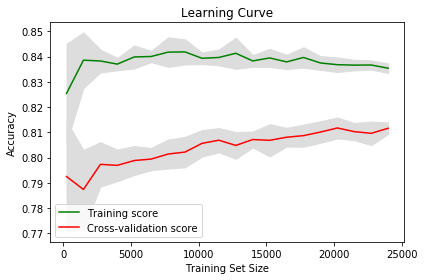

In [21]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(pruned_tree, 
                                                        df_predictors, 
                                                        df_target,
                                                        # Number of folds in cross-validation
                                                        cv=cv,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 training sets of different sizes
                                                        train_sizes=np.linspace(0.01, 1, 20))

# Means and standard deviations of 10 fold cv of training sets
train_accu_mean = np.mean(train_scores, axis=1)
train_accu_std = np.std(train_scores, axis=1)

# Means and standard deviations of 10 fold cv of test sets
test_accu_mean = np.mean(test_scores, axis=1)
test_accu_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_accu_mean, color="green",  label="Training score")
plt.plot(train_sizes, test_accu_mean, color="red", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_accu_mean - train_accu_std, train_accu_mean + train_accu_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_accu_mean - test_accu_std, test_accu_mean + test_accu_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [22]:
#Boosting
# Applying Grid Search to find Adaboost model with the best parameters
AdaBoost_tree = AdaBoostClassifier(random_state=1)
AdaBoost_tree.fit(x_train, y_train)
parameters = [{'n_estimators': [50,100,200,300,500]}] 
pruned_adaboost = GridSearchCV(estimator = AdaBoost_tree,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1)
pruned_adaboost = pruned_adaboost.fit(x_train, y_train)
best_accuracy = pruned_adaboost.best_score_
best_parameters = pruned_adaboost.best_params_

print('Accuracy: ',best_accuracy,end='\n')
print('Best Parameters: ',best_parameters,end='\n')

C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Harini Babu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.8147499999999999
Best Parameters:  {'n_estimators': 500}


In [23]:
#predict y
y_pred = pruned_adaboost.predict(x_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(mt.confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(mt.classification_report(y_test, y_pred))
print('Accuracy: ',mt.accuracy_score(y_test,y_pred))

Test Output:
Confusion Matrix:
[[4496  207]
 [ 857  440]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4703
           1       0.68      0.34      0.45      1297

    accuracy                           0.82      6000
   macro avg       0.76      0.65      0.67      6000
weighted avg       0.81      0.82      0.80      6000

Accuracy:  0.8226666666666667


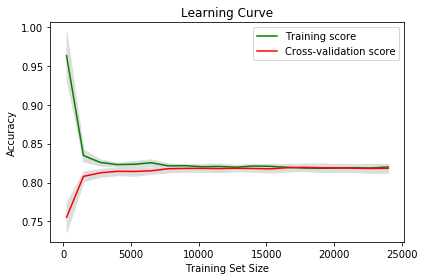

In [24]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
train_sizes, train_scores, test_scores = learning_curve(pruned_adaboost, 
                                                        df_predictors, 
                                                        df_target,
                                                        # Number of folds in cross-validation
                                                        cv=cv,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 training sets of different sizes
                                                        train_sizes=np.linspace(0.01, 1, 20))

# Means and standard deviations of 10 fold cv of training sets
train_accu_mean = np.mean(train_scores, axis=1)
train_accu_std = np.std(train_scores, axis=1)

# Means and standard deviations of 10 fold cv of test sets
test_accu_mean = np.mean(test_scores, axis=1)
test_accu_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_accu_mean, color="green",  label="Training score")
plt.plot(train_sizes, test_accu_mean, color="red", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_accu_mean - train_accu_std, train_accu_mean + train_accu_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_accu_mean - test_accu_std, test_accu_mean + test_accu_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()